In [1]:
from CelestialObjects import Planets, Stars
from MaterialProperty import MaterialProperty
from NBodySimulator import Simulator
from Conversion import distance_conversion, mass_conversion
import numpy as np

In [2]:
materials = MaterialProperty(material_list=["silicates"], material_fraction=[1])
material = materials.planet_material_property()
distance = distance_conversion([1], "AU")[0]
mass = mass_conversion([1], "Ms")[0]
radius = 6.9634e8
sun_speed = 2.20e5
earth_speed = sun_speed + 2.98e4
moon_speed = earth_speed + 1022
Sun =Stars(name="Sun", mass=mass, temperature=5300, init_position=[0,0,0], init_velocity=[0,sun_speed,0],radius=radius)
Earth = Planets(name="Earth", mass=5.972e24, init_position=[distance,0,0], init_velocity=[0,earth_speed,0], radius=6.4e6, planet_type="Rocky", planet_contour="Earth-like", material_property=material)
Moon = Planets(name="Moon", mass=7.348e22, init_position=[distance + 3.844e8, 0, 0], init_velocity=[0,moon_speed, 0], radius=1e5, planet_type="Rocky", planet_contour="Mars-like", material_property=material)
#Rock = Planets(name="Rock", mass=1e12, radius=1e3, init_position=[distance+1.76e8,0,0], init_velocity=[0, 198.0, 0], planet_contour="Earth-like", planet_type="Rocky", material_property=material)

In [3]:
simulation = Simulator(celestial_bodies=[Sun,Earth, Moon], time_step=50, simulation_time=5e7)

In [4]:
simulation.solve(simulation_method="Hamiltonian", solver="forest_ruth")

In [5]:
x = np.array(Earth.trajectory)
#y = np.array(Rock.trajectory)
z = np.array(Moon.trajectory)
s = np.array(Sun.trajectory)

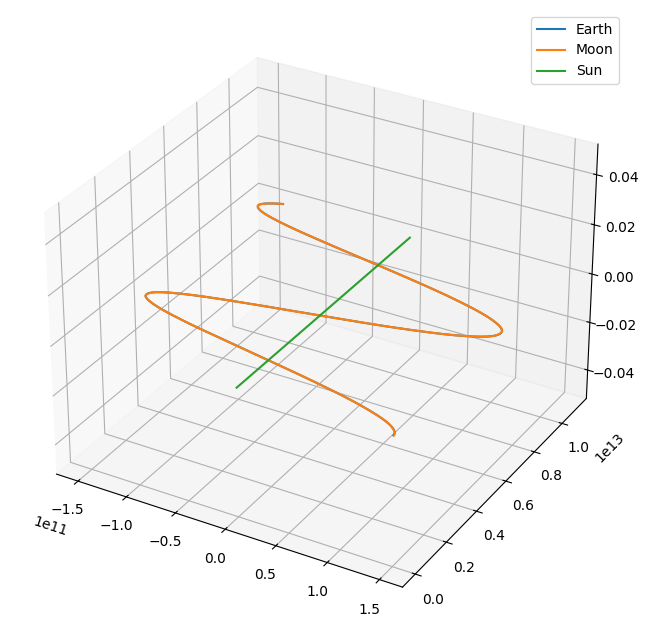

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(x[:,0], x[:,1], x[:,2], label="Earth")
#ax.plot(y[:,0], y[:,1], y[:,2], label="Rock")
ax.plot(z[:,0], z[:,1], z[:,2], label="Moon")
ax.plot(s[:,0], s[:,1], s[:,2], label="Sun")
plt.legend()

In [10]:
import pyvista as pv
import time

plotter = pv.Plotter()
plotter.set_background("black")

s1 = pv.Sphere(radius=100*Earth.radius, center=x[0])
s2 = pv.Sphere(radius=100*Moon.radius, center=z[0])
s3 = pv.Sphere(radius=100*Sun.radius, center=s[0])

earth = plotter.add_mesh(s1, color="blue")
moon = plotter.add_mesh(s2, color="grey")
sun = plotter.add_mesh(s3, color="yellow")

def update_scene(i):
    earth.SetPosition(x[i])
    moon.SetPosition(z[i])
    sun.SetPosition(s[i])
    plotter.render()

plotter.open_gif("Animation.gif")
for i in range(x.shape[0]//1000):
    update_scene(i)
    plotter.write_frame()

plotter.close()